In [97]:
#Visual re-ranker with GloVe

In [2]:
import gensim #4.0.1
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
model_path = 'glove.6B.300d.txt'

glove_file = datapath(model_path)

tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

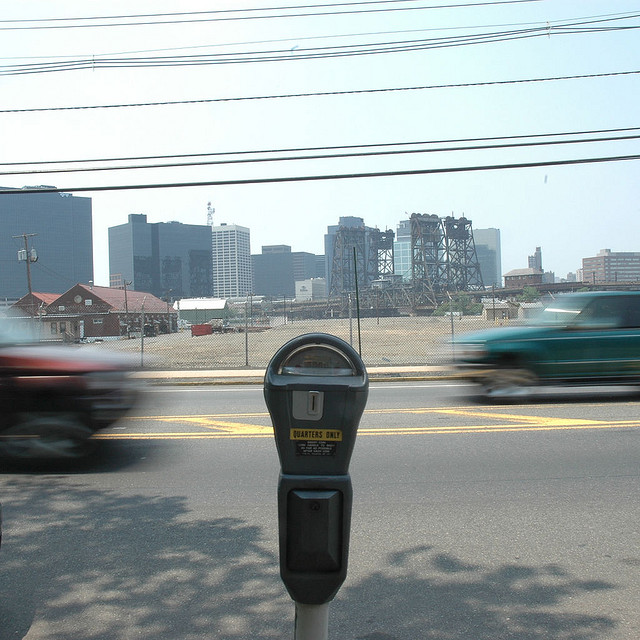

In [48]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import HTML, display
Image("COCO_train2014_000000201409.jpg", width=300, height=100)

In [45]:
#bounding box 
Image("COCO_train2014_000000201409_1.jpg", width=100, height=100)

In [51]:
#Out-of-the-box baseline output 
# w1: quartos
# w2: quotas
# w3: quarters --> correct one 

In [96]:
# word embedding based visual re-re-ranker 
def visual_reranker(LM, visual_context, classifier_confidence, spotted_word, baseline_score):
    
    sim = model.similarity(visual_context,spotted_word)
        
    # hypothesis revision based visual re-ranker
    score = pow(float(LM),pow((1-float(sim))/(1+ float(sim)),1-float(classifier_confidence)))    
    score = float(score) * float(baseline_score) 
          
    return score

In [ ]:
## inputs to the visual re-ranker 
# The spotted word from the baseline 
spotted_word = 'quarters'
# baseline output score (softmax score)
Baseline = 0.03037
# Initialize the original hypothesis (ie spotted word) with common observatio -ie LM  
LM = 0.00023182
# Extract the visual information from the image (class label) -ie Resent152
visual_context = 'parking'
#visual classifier confidence prediction 
classifier_confidence = '0.99998'

In [54]:
# Now lets re-rank the spotted word to its visual context information

In [61]:
# w1 
print(visual_reranker(3.43E-08, 'parking', classifier_confidence, 'quotas', 0.060192))

2.0646558155918546e-09


In [62]:
# w2
print(visual_reranker(9.99E-06, 'parking', classifier_confidence, 'quartos', 0.040944))

4.090075078272597e-07


In [85]:
# w3 
print(visual_reranker(0.03037, 'parking', classifier_confidence, 'quarters', 0.03037))

0.0009223656700924777


In [92]:
w1 = 2.0646558155918546e-09 # 'quotas'
w2 = 4.090075078272597e-07 #  'quartos'
w3 = 7.040899415696516e-06 #  'quarters'

In [95]:
top_k_w=max(w1,w2,w3)
print(top_k_w) # 'quarters'

7.040899415696516e-06
